<a href="https://colab.research.google.com/github/NISHANTRAI19/gradient_boosting/blob/main/gradient_boosting_simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Boosting (step-by-step) - Internal working of XGBoost (simplified)

In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

Generate synthetic quadratic data


In [22]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5   # 100 samples between -0.5 and 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)  # quadratic with noise

dataframe = pd.DataFrame({"X": X.reshape(-1), "y": y})

 Step 1: Baseline model (mean)

In [34]:
pred_mean = dataframe['y'].mean()
dataframe['pred1'] = pred_mean
dataframe['residual_1'] = dataframe['y'] - dataframe['pred1']

Plotting the graph for the initial prediction

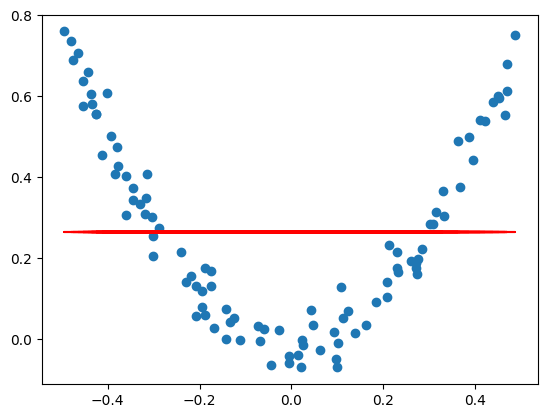

In [35]:
plt.scatter(dataframe['X'], dataframe['y'])
plt.plot(dataframe['X'], dataframe['pred1'], color='red')
plt.show()

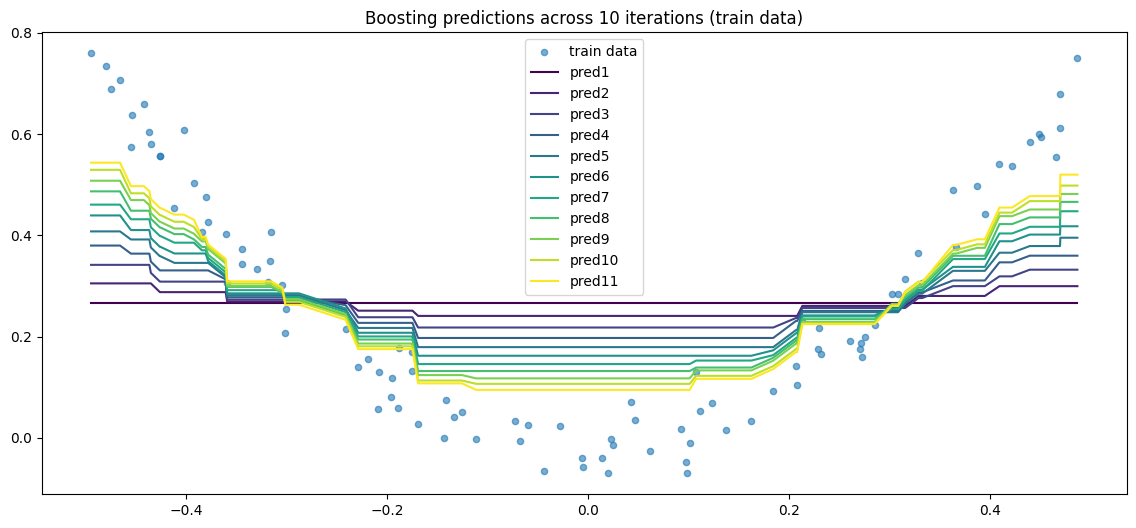

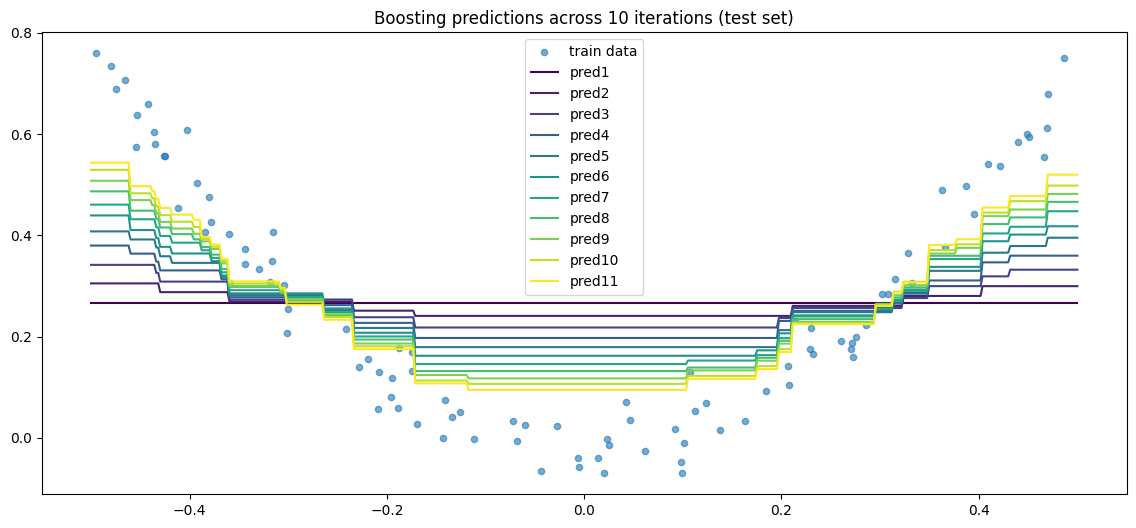

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Test grid ---
X_test = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)

# --- Boosting loop ---
trees = []
learning_rate = 0.1

# store all predictions for plotting
preds_train = [np.full_like(dataframe['y'], pred_mean)]   # pred1
preds_test = [np.full(X_test.shape[0], pred_mean)]

residuals = [dataframe['y'] - preds_train[-1]]
mse_train, mse_test = [], []
mae_train, mae_test = [], []
r2_train, r2_test   = [], []

for i in range(10):  # 10 iterations
    tree = DecisionTreeRegressor(max_leaf_nodes=8, random_state=42)
    tree.fit(dataframe['X'].values.reshape(-1, 1), residuals[-1])
    trees.append(tree)

    # update predictions
    new_pred_train = preds_train[-1] + learning_rate * tree.predict(dataframe['X'].values.reshape(-1, 1))
    new_pred_test  = preds_test[-1] + learning_rate * tree.predict(X_test)

    preds_train.append(new_pred_train)
    preds_test.append(new_pred_test)

    # update residuals
    residuals.append(dataframe['y'] - new_pred_train)
    mse_train.append(mean_squared_error(y, new_pred_train))
    mae_train.append(mean_absolute_error(y, new_pred_train))
    r2_train.append(r2_score(y, new_pred_train))
    y_test_true = 3 * X_test[:, 0]**2  # same function, without noise
    mse_test.append(mean_squared_error(y_test_true, new_pred_test))
    mae_test.append(mean_absolute_error(y_test_true, new_pred_test))
    r2_test.append(r2_score(y_test_true, new_pred_test))

# --- Plot training predictions for each iteration ---
sorted_idx = np.argsort(dataframe['X'])
plt.figure(figsize=(14, 6))
plt.scatter(dataframe['X'], dataframe['y'], s=20, alpha=0.6, label="train data")

colors = plt.cm.viridis(np.linspace(0, 1, len(preds_train)))

for i, pred in enumerate(preds_train):
    plt.plot(dataframe['X'].values[sorted_idx],
             pred[sorted_idx],
             color=colors[i],
             label=f"pred{i+1}")

plt.legend()
plt.title("Boosting predictions across 10 iterations (train data)")
plt.show()


# --- Plot test predictions for each iteration ---
plt.figure(figsize=(14, 6))
plt.scatter(dataframe['X'], dataframe['y'], s=20, alpha=0.6, label="train data")

for i, pred in enumerate(preds_test):
    plt.plot(X_test, pred, color=colors[i], label=f"pred{i+1}")

plt.legend()
plt.title("Boosting predictions across 10 iterations (test set)")
plt.show()

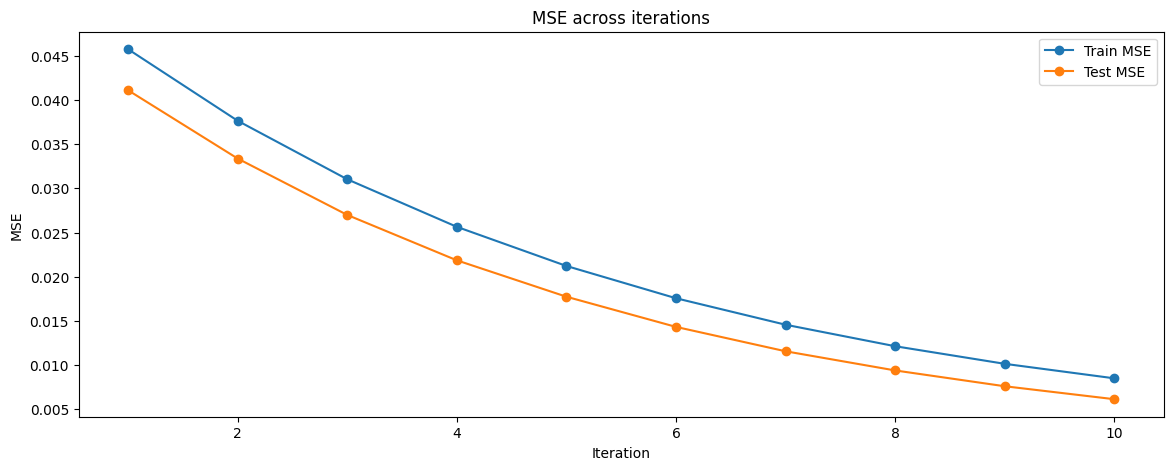

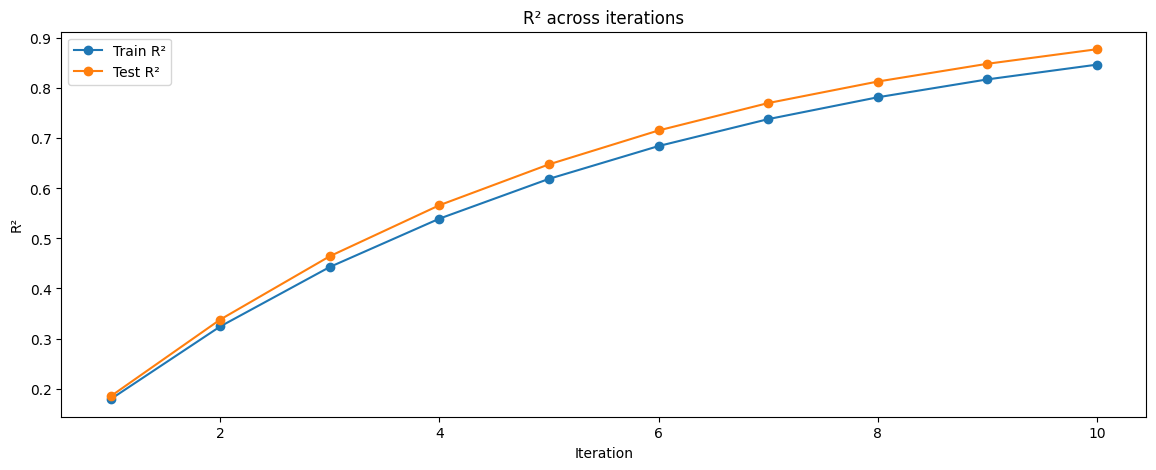

In [48]:
iters = np.arange(1, 11)

plt.figure(figsize=(14, 5))
plt.plot(iters, mse_train, marker='o', label="Train MSE")
plt.plot(iters, mse_test, marker='o', label="Test MSE")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE across iterations")
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(iters, r2_train, marker='o', label="Train R²")
plt.plot(iters, r2_test, marker='o', label="Test R²")
plt.xlabel("Iteration")
plt.ylabel("R²")
plt.title("R² across iterations")
plt.legend()
plt.show()